In [1]:
#Import Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
#Loading the dataset
data = pd.read_csv("Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#Our project is based on maize prediction so we need to check the total number of label which are maize
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
# we labeling the output that 0 means not suitable for maize,1 sutable for maize
data['label'] = data['label'].apply(lambda x: 1 if x== 'maize' else 0)

In [5]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0


In [6]:
#printing the first 5 rows in a dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [7]:
#printing the last 5 rows in a dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,0


In [8]:
#printing the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [9]:
#checking the sum of  null value in the dataset.
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
# descriptive statistical measures about the dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,0.045455
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,0.208346
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,0.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,0.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,0.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,1.000000


C:\Users\ENOCK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


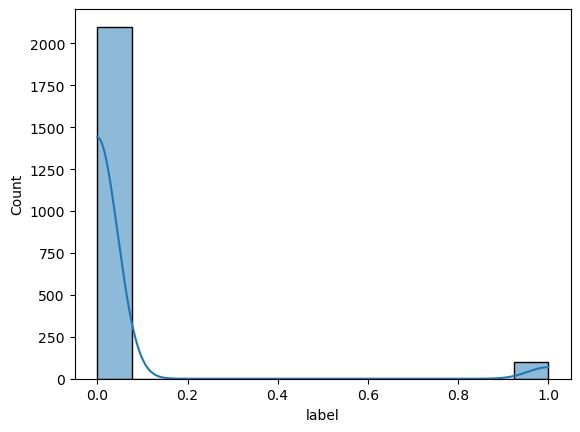

In [11]:
sns.histplot(data['label'], kde=True)
plt.show()



In [13]:
#Counting the output variable
data['label'].value_counts()

label
0    2100
1     100
Name: count, dtype: int64

## Since the output variable are imbalance that will be difficult in predicting the ouput so we will apply SMOTE(Synthentic Minority Over-sampling Technique) which will able to balance the output variable

In [14]:
#splitting into dependent(x) and independent(y) variable
X = data.drop(columns="label",axis=1)
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
y=data['label']

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2195    0
2196    0
2197    0
2198    0
2199    0
Name: label, Length: 2200, dtype: int64

In [17]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_re, y_re = smote.fit_resample(X, y)
print(y_re)
y_re.value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
4195    1
4196    1
4197    1
4198    1
4199    1
Name: label, Length: 4200, dtype: int64


label
0    2100
1    2100
Name: count, dtype: int64

In [18]:
X_re

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
4195,86,59,22,20.536271,64.129677,6.444047,62.526299
4196,61,56,20,18.431113,57.867657,6.281084,66.056046
4197,77,53,18,24.886223,68.390654,5.989366,77.109876
4198,90,57,17,24.645860,58.877494,5.942656,103.766778


In [19]:
#Creating a dataframe
df_resampled = pd.DataFrame(X_re, columns=X.columns)
df_resampled['label'] = y_re
df_resampled

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
4195,86,59,22,20.536271,64.129677,6.444047,62.526299,1
4196,61,56,20,18.431113,57.867657,6.281084,66.056046,1
4197,77,53,18,24.886223,68.390654,5.989366,77.109876,1
4198,90,57,17,24.645860,58.877494,5.942656,103.766778,1


C:\Users\ENOCK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


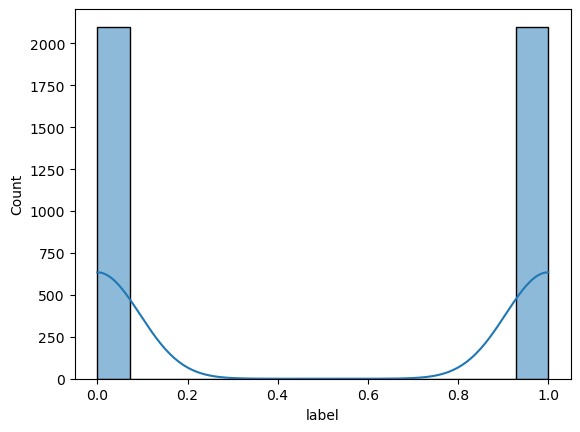

In [20]:
sns.histplot(df_resampled['label'], kde=True)
plt.show()


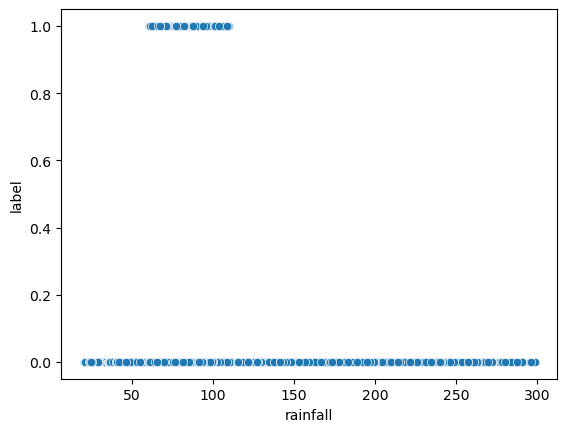

In [21]:
sns.scatterplot(x='rainfall', y='label', data=df_resampled)
plt.show()


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X_re,y_re,test_size=0.4,random_state=2)

In [23]:
print("X_train: ",x_train.shape)
print("Y_train: ",y_train.shape)
print("X_test: ",x_test.shape)
print("Y_test: ",y_test.shape)

X_train:  (2520, 7)
Y_train:  (2520,)
X_test:  (1680, 7)
Y_test:  (1680,)


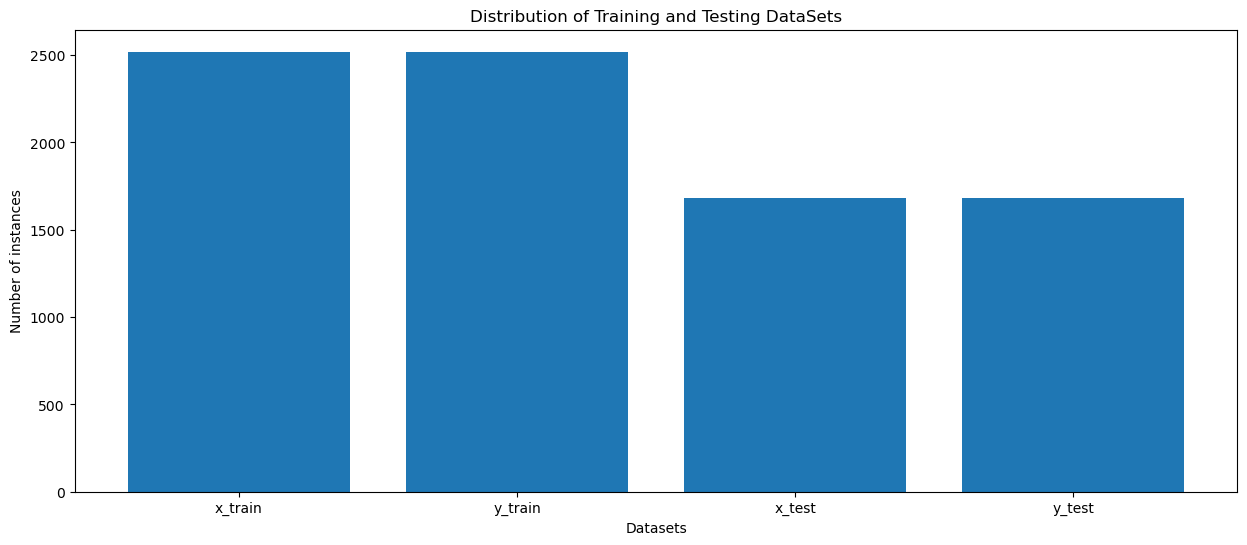

In [24]:
#Creating a bar graph showing the number of instances of training dataset and testing dataset
shapes = {
    'x_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'x_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Testing DataSets')
plt.show()

In [25]:
#Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [29]:
random_score = accuracy_score(y_pred,y_test)
random_score

0.9964285714285714

In [30]:
#confusion matrix of random forest model
conf_matrix_rand = confusion_matrix(y_pred,y_test)
conf_matrix_rand

array([[840,   6],
       [  0, 834]], dtype=int64)

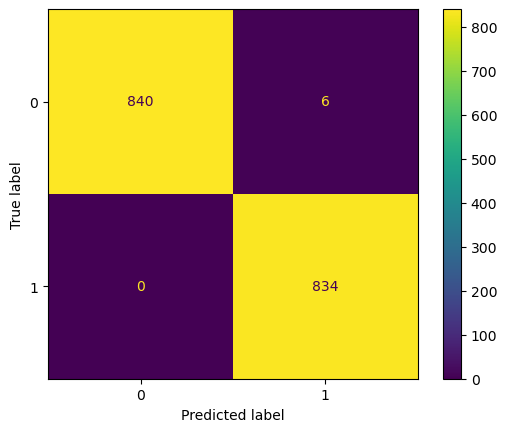

In [31]:
# visualize the confusion matrix of random Forest
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rand)
disp.plot(cmap='viridis')
plt.show()

In [32]:
random_repo = classification_report(y_pred,y_test)
print(random_repo)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       846
           1       0.99      1.00      1.00       834

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [33]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred1 = classifier1.predict(x_test)
y_pred1

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [35]:
Logistic_score = accuracy_score(y_pred1,y_test)
Logistic_score

0.9339285714285714

In [36]:
#confusion matrix of logistic regression algorithm
conf_matrix_logi = confusion_matrix(y_pred1,y_test)
conf_matrix_logi

array([[755,  26],
       [ 85, 814]], dtype=int64)

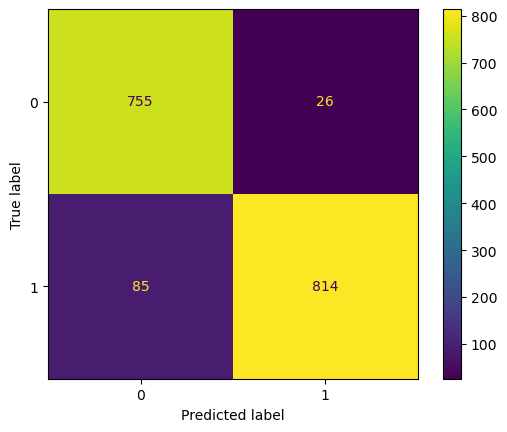

In [37]:
# visualize the confusion matrix of Logistic regression algorithms
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_logi)
disp.plot(cmap='viridis')
plt.show()

In [38]:
repo_logistic =classification_report(y_pred1,y_test)
print(repo_logistic)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       781
           1       0.97      0.91      0.94       899

    accuracy                           0.93      1680
   macro avg       0.93      0.94      0.93      1680
weighted avg       0.94      0.93      0.93      1680



In [39]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred2 = classifier2.predict(x_test)
y_pred2

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
Decision_score = accuracy_score(y_pred2,y_test)
Decision_score

0.9964285714285714

In [42]:
#confusion matrix of Decision tree algorithm
conf_matrix_decision = confusion_matrix(y_pred2,y_test)
conf_matrix_decision

array([[840,   6],
       [  0, 834]], dtype=int64)

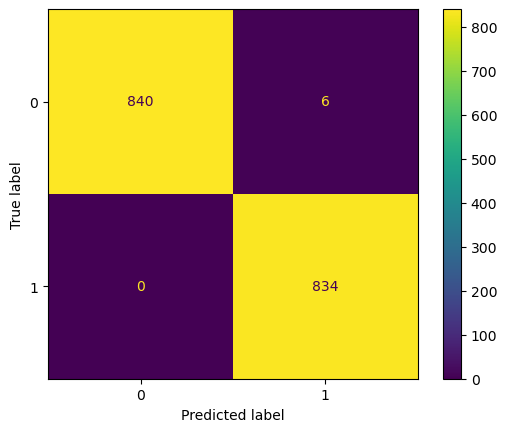

In [43]:
# visualize the confusion matrix of Decision Tree algorithms
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_decision)
disp.plot(cmap='viridis')
plt.show()

In [44]:
#classification report for decision tree algorithm
repo_decision = classification_report(y_pred2,y_test)
print(repo_decision)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       846
           1       0.99      1.00      1.00       834

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [45]:
#Support Vector Machine
from sklearn.svm import SVC
classifier3 = SVC()
classifier3.fit(x_train,y_train)

SVC()

In [46]:
y_pred3 = classifier3.predict(x_test)
y_pred3

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [47]:
Support_vector_score = accuracy_score(y_pred3,y_test)
Support_vector_score

0.9940476190476191

In [48]:
#confusion matrix of Support Vector algorithm
conf_matrix_svm = confusion_matrix(y_pred3,y_test)
conf_matrix_svm

array([[830,   0],
       [ 10, 840]], dtype=int64)

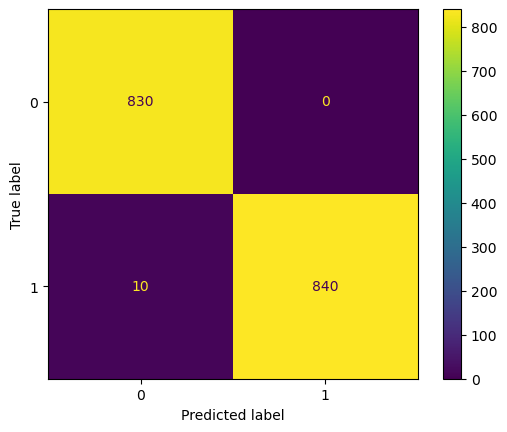

In [49]:
# visualize the confusion matrix of Decision Tree algorithms
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm)
disp.plot(cmap='viridis')
plt.show()

In [50]:
repo_svm = classification_report(y_pred3,y_test)
print(repo_svm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       830
           1       1.00      0.99      0.99       850

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680



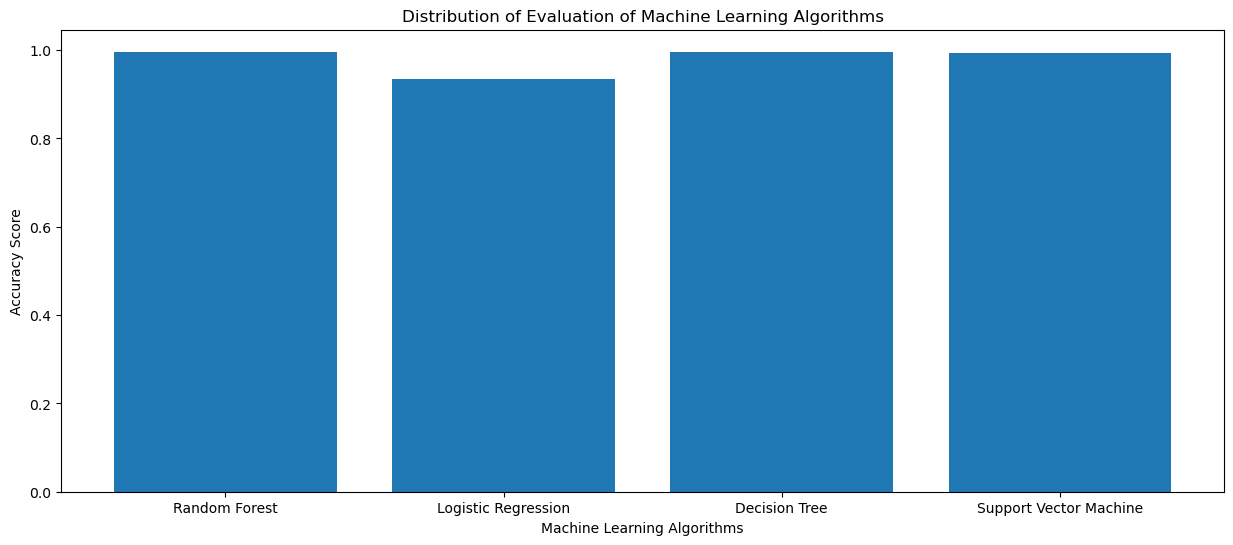

In [51]:
shapes = {
    'Random Forest': random_score,
    'Logistic Regression': Logistic_score,
    'Decision Tree': Decision_score,
    'Support Vector Machine': Support_vector_score
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Distribution of Evaluation of Machine Learning Algorithms')
plt.show()

In [52]:
import joblib

In [53]:
joblib.dump(classifier,"ml_model.joblib")

['ml_model.joblib']

In [54]:
model=joblib.load("ml_model.joblib")
model

RandomForestClassifier()

In [55]:
model.predict([[61,56,20,18.431113,57.867657,6.281084,66.056046]])

C:\Users\ENOCK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)